In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
from scipy import stats

In [2]:
batting = pd.read_csv('battingStatsConsolidated.csv')
salaries = pd.read_csv('playerSalary+WAR98-08-Consol.csv')
teamData = pd.read_csv("Team_Data_Consolidated.csv")

In [3]:
salariesDf = salaries.dropna()
salariesDf.rename(columns = {'Year': 'yearID'}, inplace = True)

/Users/kevinjordan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [4]:
batting

,playerID,yearID,teamID,G,AB,R,HR,RBI,BA,OBP,SLG,OPS,PA,H,TB,onBase
0,abbotje01,1998,CHA,89,244,33,12,41,0.278688525,0.298850575,0.491803279,0.790653854,261,68,120,78
1,abbotji01,1998,CHA,5,0,0,0,0,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,0,0,0,0
2,abbotku01,1998,OAK,35,123,17,2,9,0.268292683,0.323529412,0.390243902,0.713773314,136,33,48,44
3,abbotku01,1998,COL,42,71,9,3,15,0.253521127,0.276315789,0.464788732,0.741104521,76,18,33,21
4,abbotpa01,1998,SEA,4,0,0,0,0,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,0,0,0,0
5,abreubo01,1998,PHI,151,497,68,17,74,0.311871227,0.419568823,0.496981891,0.916550714,603,155,247,253
6,aceveju01,1998,SLN,50,17,2,0,0,0.176470588,0.2,0.235294118,0.435294118,20,3,4,4
7,adamsjo02,1998,ARI,5,7,0,0,1,0.428571429,0.375,0.571428571,0.946428571,8,3,4,3
8,adamste01,1998,CHN,63,1,0,0,0,0,0,0,0,1,0,0,0
9,agbaybe01,1998,NYN,11,15,1,0,0,0.133333333,0.1875,0.133333333,0.320833333,16,2,2,3


In [23]:
battingDf = batting.loc[batting['PA'] > 400]
battingDf.count()

playerID    2267
yearID      2267
teamID      2267
G           2267
AB          2267
R           2267
HR          2267
RBI         2267
BA          2267
OBP         2267
SLG         2267
OPS         2267
PA          2267
H           2267
TB          2267
onBase      2267
dtype: int64

In [6]:
salariesDf.count()

playerID           8839
yearID             8839
Tm                 8839
WAR                8839
Salary_Raw         8839
Salary_Adjusted    8839
dtype: int64

In [7]:
battingSalaries = pd.merge(battingDf, salariesDf, on= ['playerID', 'yearID'], how = 'inner')
battingSalaries

,playerID,yearID,teamID,G,AB,R,HR,RBI,BA,OBP,SLG,OPS,PA,H,TB,onBase,Tm,WAR,Salary_Raw,Salary_Adjusted
0,abreubo01,1998,PHI,151,497,68,17,74,0.311871227,0.419568823,0.496981891,0.916550714,603,155,247,253,PHI,6.4,180000,276923.08
1,alfoned01,1998,NYN,144,557,94,17,78,0.278276481,0.354992076,0.427289048,0.782281124,631,155,238,224,NYM,2.7,1750000,2692307.69
2,alomaro01,1998,BAL,147,588,86,14,56,0.282312925,0.348484848,0.418367347,0.766852195,660,166,246,230,BAL,3.8,6343771,9759647.69
3,alomasa02,1998,CLE,117,409,45,6,44,0.234718826,0.267123288,0.35207824,0.619201528,438,96,144,117,CLE,-0.2,2725000,4192307.69
4,aloumo01,1998,HOU,159,584,104,38,124,0.311643836,0.408695652,0.582191781,0.990887433,690,182,340,282,HOU,6.2,5020000,7723076.92
5,anderbr01,1998,BAL,133,479,84,18,51,0.235908142,0.354782609,0.419624217,0.774406826,575,113,201,204,BAL,1.5,5441843,8372066.15
6,anderga01,1998,ANA,156,622,62,15,79,0.294212219,0.331831832,0.454983923,0.786815755,666,183,283,221,ANA,0.3,1500000,2307692.31
7,andresh01,1998,MON,150,492,48,25,69,0.237804878,0.316725979,0.455284553,0.772010532,562,117,224,178,MON,2.0,450000,692307.69
8,aurilri01,1998,SFG,122,413,54,9,49,0.266343826,0.320175439,0.406779661,0.7269551,456,110,168,146,SFG,2.0,265000,407692.31
9,ausmubr01,1998,HOU,128,412,62,6,45,0.269417476,0.368530021,0.356796117,0.725326138,483,111,147,178,HOU,1.7,1600000,2461538.46


In [8]:
battingSalaries = battingSalaries.loc[battingSalaries['Salary_Adjusted'] > 500000]

y=0.7209285329124356x+4.796793496435749
0.286504373246
r-squared: 8.21%


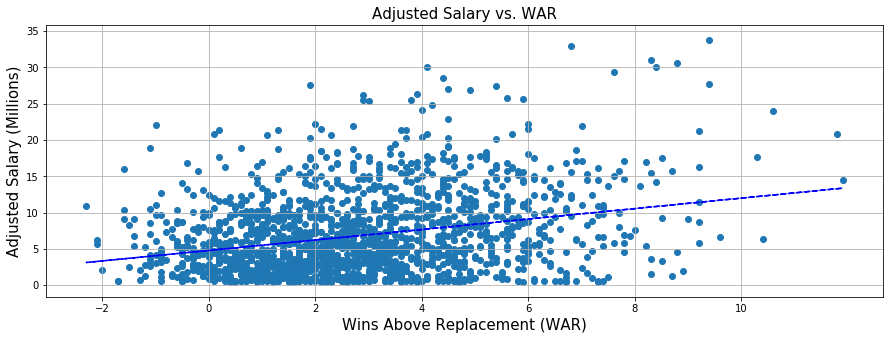

In [9]:
X = battingSalaries['WAR']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(-2, 12, 2))
plt.xlabel('Wins Above Replacement (WAR)', size=15)
plt.ylabel('Adjusted Salary (Millions)', size=15)
plt.title('Adjusted Salary vs. WAR', size=15)

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.1845911466178405x+3.2047493618422287
0.388964462793
r-squared: 15.13%


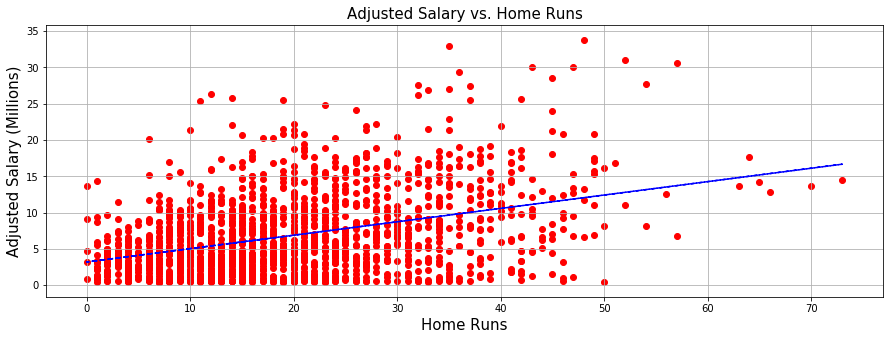

In [10]:
X = battingSalaries['HR']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 80, 10))
plt.xlabel('Home Runs', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. Home Runs', size = 15)

plt.scatter(X, Y, color = 'r')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.07355129441292342x+1.1993387226793288
0.359216458149
r-squared: 12.90%


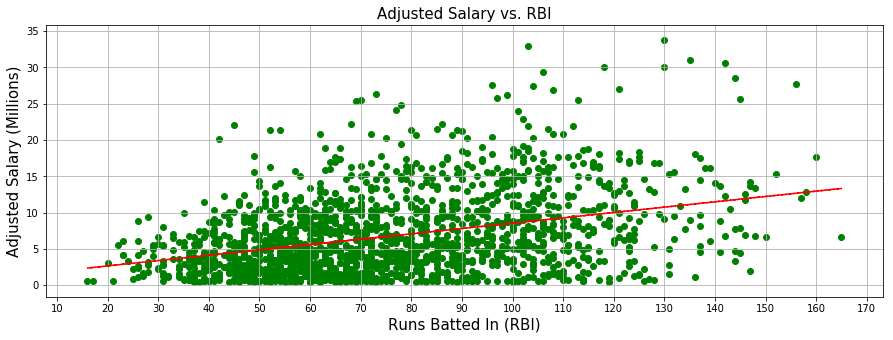

In [11]:
X = battingSalaries['RBI']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 200, 10))
plt.xlabel('Runs Batted In (RBI)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. RBI', size = 15)

plt.scatter(X, Y, color = 'g')
plt.plot(X, fit, 'r--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=33.5413156967582x+-2.605170831448576
0.169326888071
r-squared: 2.87%


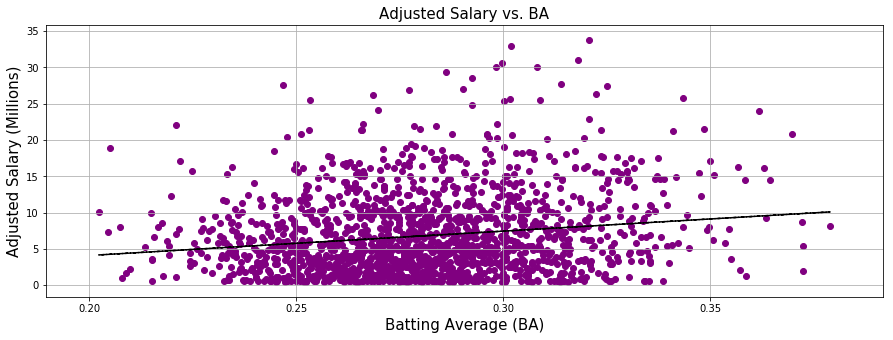

In [12]:
X = battingSalaries['H']/battingSalaries['AB']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, .400, .050))
plt.xlabel('Batting Average (BA)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. BA', size = 15)

plt.scatter(X, Y, color = 'purple')
plt.plot(X, fit, 'k--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=50.47078604365229x+-11.277517976463596
0.378836614473
r-squared: 14.35%


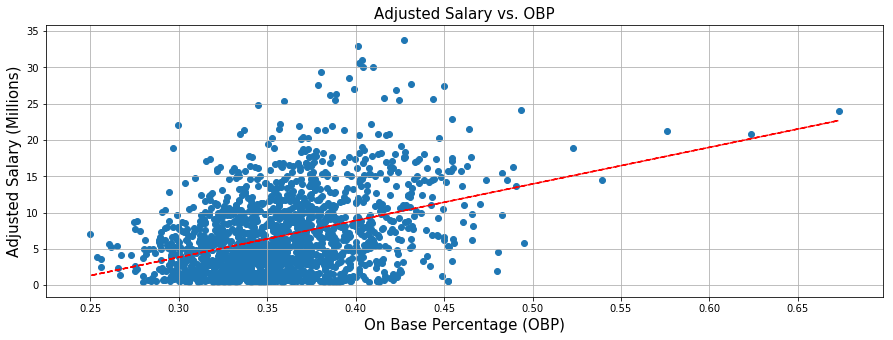

In [13]:
X = battingSalaries['onBase']/battingSalaries['PA']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, .700, .050))
plt.xlabel('On Base Percentage (OBP)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. OBP', size = 15)

plt.scatter(X, Y)
plt.plot(X, fit, 'r--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=25.8875720147097x+-5.141236521552941
0.36442148524
r-squared: 13.28%


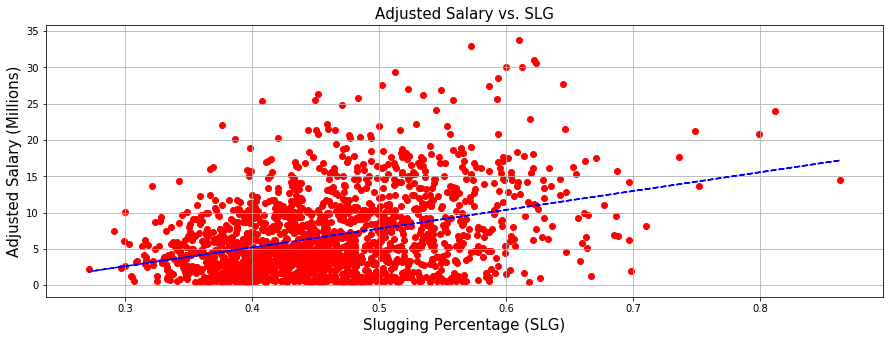

In [14]:
X = battingSalaries['TB']/battingSalaries['AB']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 1, .1))
plt.xlabel('Slugging Percentage (SLG)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. SLG', size = 15)

plt.scatter(X, Y, color = 'r')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.0709162144105572x+1.2331808186629978
0.29186929505
r-squared: 8.52%


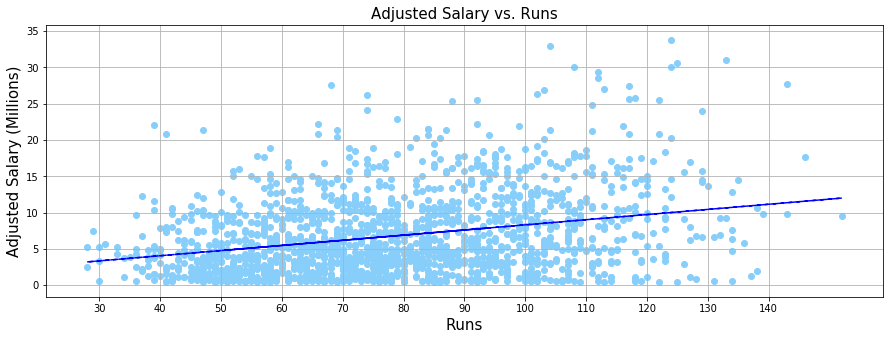

In [15]:
X = battingSalaries['R']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Runs', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. Runs', size = 15)

plt.scatter(X, Y, color = 'lightskyblue')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.03043991231073022x+2.4157012852414246
0.171992098764
r-squared: 2.96%


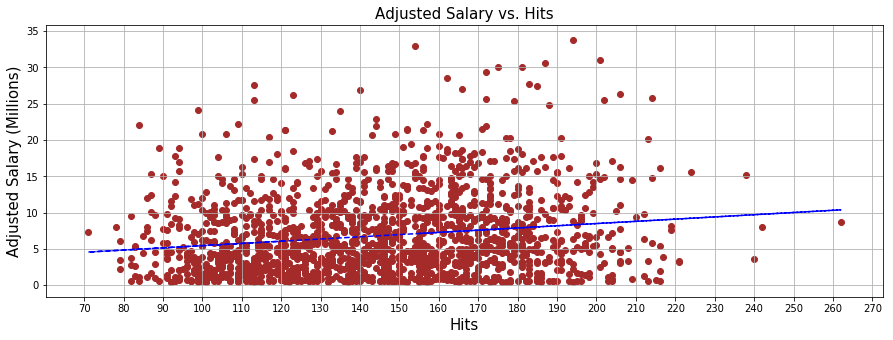

In [16]:
X = battingSalaries['H']
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 300, 10))
plt.xlabel('Hits', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. Hits', size = 15)

plt.scatter(X, Y, color = 'brown')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=19.587062326694333x+-9.253160735492347
0.395194419525
r-squared: 15.62%


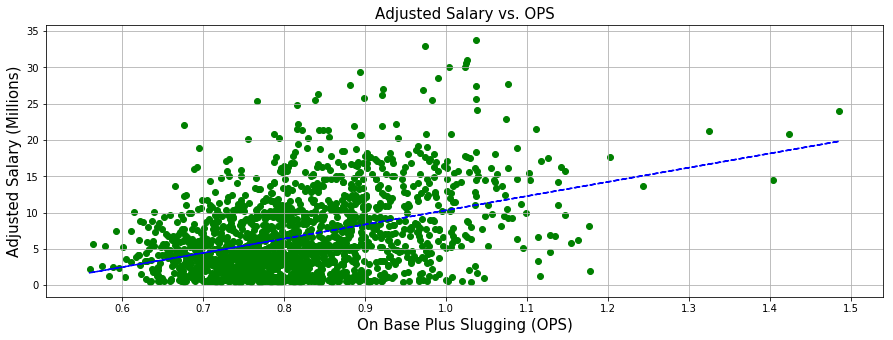

In [30]:
X = battingSalaries['OPS'].astype('float')
Y = (battingSalaries['Salary_Adjusted'])/1000000
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 2, .1))
plt.xlabel('On Base Plus Slugging (OPS)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. OPS', size = 15)

plt.scatter(X, Y, color = 'green')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

In [26]:
barryBonds = battingSalaries.loc[battingSalaries['playerID'] == 'bondsba01']
alexRod = battingSalaries.loc[battingSalaries['playerID'] == 'rodrial01']
manRam = battingSalaries.loc[battingSalaries['playerID'] == 'ramirma02']
manRam

,playerID,yearID,teamID,G,AB,R,HR,RBI,BA,OBP,SLG,OPS,PA,H,TB,onBase,Tm,WAR,Salary_Raw,Salary_Adjusted
152,ramirma02,1998,CLE,150,571,108,45,145,0.294220665,0.382660688,0.598949212,0.9816099,669,168,342,256,CLE,5.3,2850000,4384615.38
347,ramirma02,1999,CLE,147,522,131,44,165,0.333333333,0.449922958,0.662835249,1.112758207,649,174,346,292,CLE,7.3,4350000,6590909.09
544,ramirma02,2000,CLE,118,439,92,38,122,0.350797267,0.465804067,0.697038724,1.162842791,541,154,306,252,CLE,4.8,4250000,6250000.00
735,ramirma02,2001,BOS,142,529,93,41,125,0.306238185,0.427906977,0.608695652,1.036602629,645,162,322,276,BOS,5.2,13050000,18380281.69
924,ramirma02,2002,BOS,120,436,84,33,107,0.348623853,0.464285714,0.646788991,1.111074705,532,152,282,247,BOS,6.0,15462727,21476009.72
1121,ramirma02,2003,BOS,154,569,117,37,104,0.32513181,0.449787836,0.586994728,1.036782564,707,185,334,318,BOS,5.4,20000000,27397260.27
1316,ramirma02,2004,BOS,152,568,108,43,130,0.308098592,0.410029499,0.612676056,1.022705555,678,175,348,278,BOS,4.1,22500000,30000000.00
1518,ramirma02,2005,BOS,152,554,112,45,144,0.292418773,0.396054628,0.593862816,0.989917444,659,162,329,261,BOS,4.4,22000000,28571428.57
1710,ramirma02,2006,BOS,130,449,79,35,102,0.320712695,0.454703833,0.619153675,1.073857508,574,144,278,261,BOS,4.5,18279238,22849047.50
1906,ramirma02,2007,BOS,133,483,84,20,88,0.296066253,0.402061856,0.492753623,0.894815479,582,143,238,234,BOS,1.1,17016381,20751684.15


In [27]:
bondsGiants = pd.merge(barryBonds, teamData, on= ['teamID', 'yearID'], how = 'left')
rodTeam = pd.merge(alexRod, teamData, on= ['teamID', 'yearID'], how = 'left')
manTeam = pd.merge(manRam, teamData, on= ['teamID', 'yearID'], how = 'left')
manTeam

,playerID,yearID,teamID,G,AB,R,HR,RBI,BA,OBP,...,OPS,PA,H,TB,onBase,Tm,WAR,Salary_Raw,Salary_Adjusted,W%
0,ramirma02,1998,CLE,150,571,108,45,145,0.294220665,0.382660688,...,0.9816099,669,168,342,256,CLE,5.3,2850000,4384615.38,0.549383
1,ramirma02,1999,CLE,147,522,131,44,165,0.333333333,0.449922958,...,1.112758207,649,174,346,292,CLE,7.3,4350000,6590909.09,0.598765
2,ramirma02,2000,CLE,118,439,92,38,122,0.350797267,0.465804067,...,1.162842791,541,154,306,252,CLE,4.8,4250000,6250000.00,0.555556
3,ramirma02,2001,BOS,142,529,93,41,125,0.306238185,0.427906977,...,1.036602629,645,162,322,276,BOS,5.2,13050000,18380281.69,0.509317
4,ramirma02,2002,BOS,120,436,84,33,107,0.348623853,0.464285714,...,1.111074705,532,152,282,247,BOS,6.0,15462727,21476009.72,0.574074
5,ramirma02,2003,BOS,154,569,117,37,104,0.32513181,0.449787836,...,1.036782564,707,185,334,318,BOS,5.4,20000000,27397260.27,0.586420
6,ramirma02,2004,BOS,152,568,108,43,130,0.308098592,0.410029499,...,1.022705555,678,175,348,278,BOS,4.1,22500000,30000000.00,0.604938
7,ramirma02,2005,BOS,152,554,112,45,144,0.292418773,0.396054628,...,0.989917444,659,162,329,261,BOS,4.4,22000000,28571428.57,0.586420
8,ramirma02,2006,BOS,130,449,79,35,102,0.320712695,0.454703833,...,1.073857508,574,144,278,261,BOS,4.5,18279238,22849047.50,0.530864
9,ramirma02,2007,BOS,133,483,84,20,88,0.296066253,0.402061856,...,0.894815479,582,143,238,234,BOS,1.1,17016381,20751684.15,0.592593


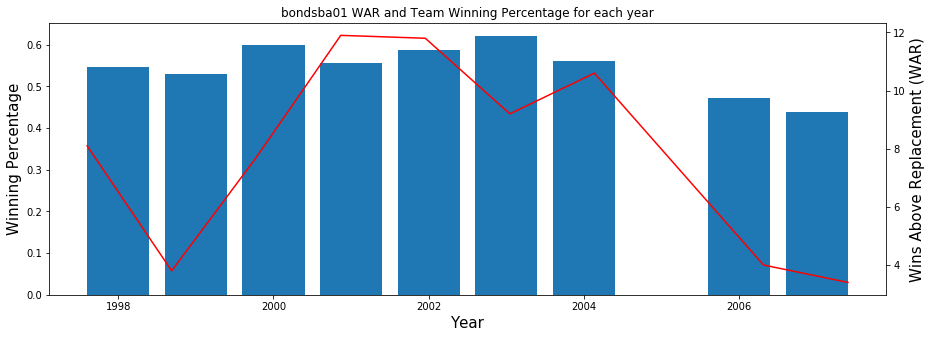

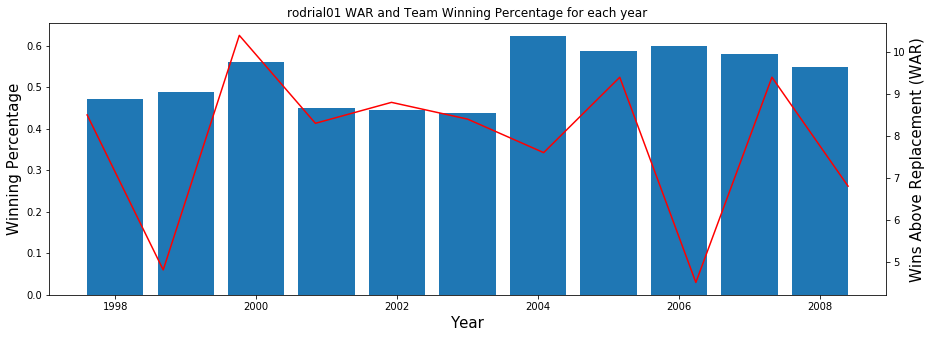

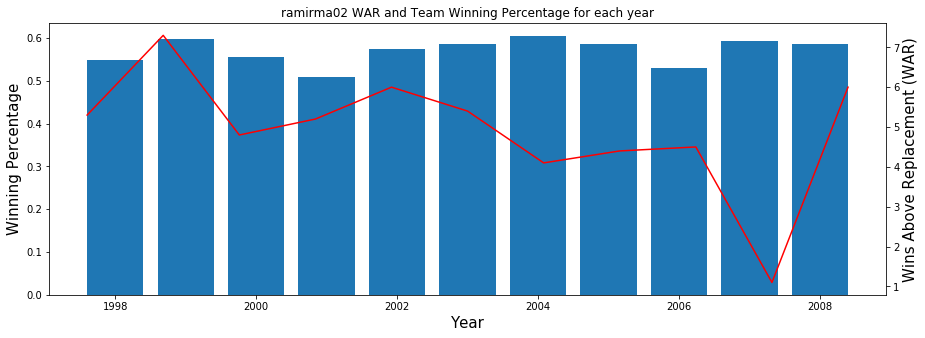

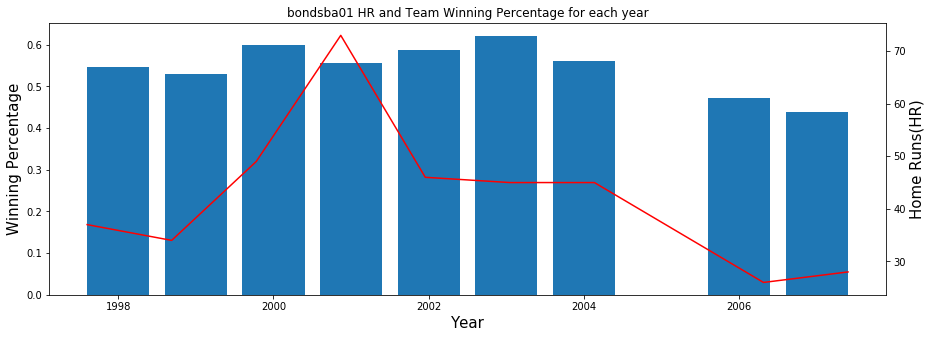

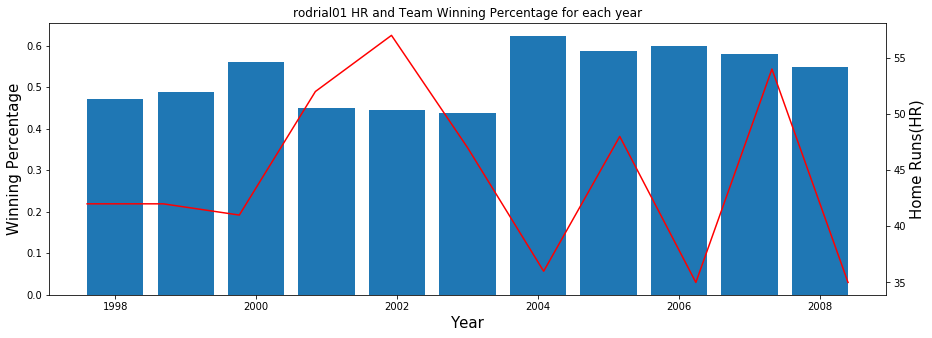

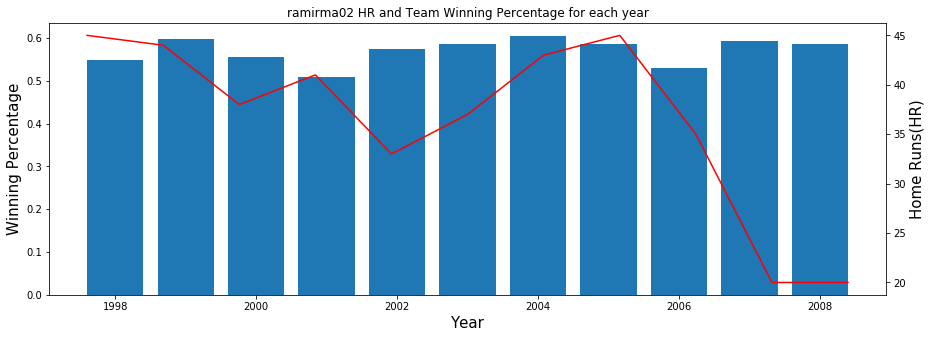

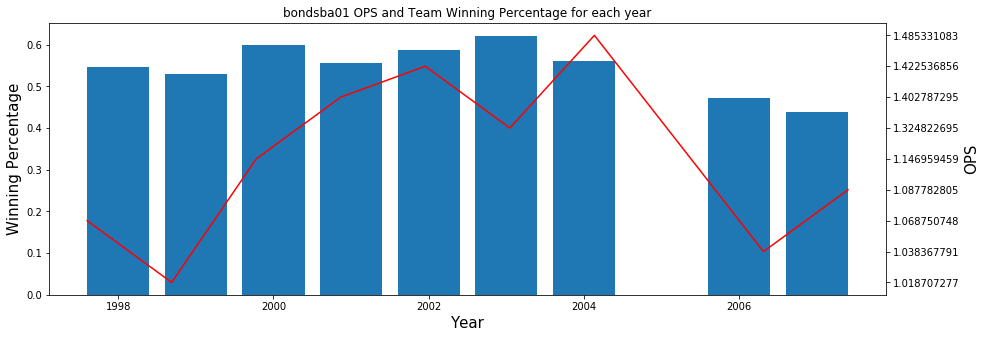

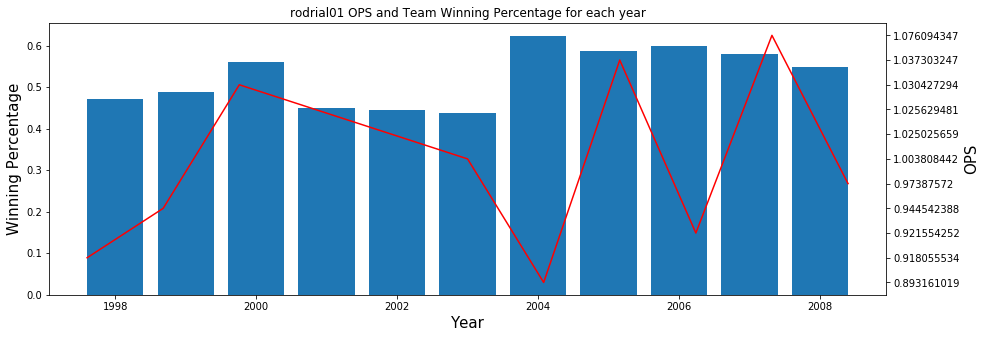

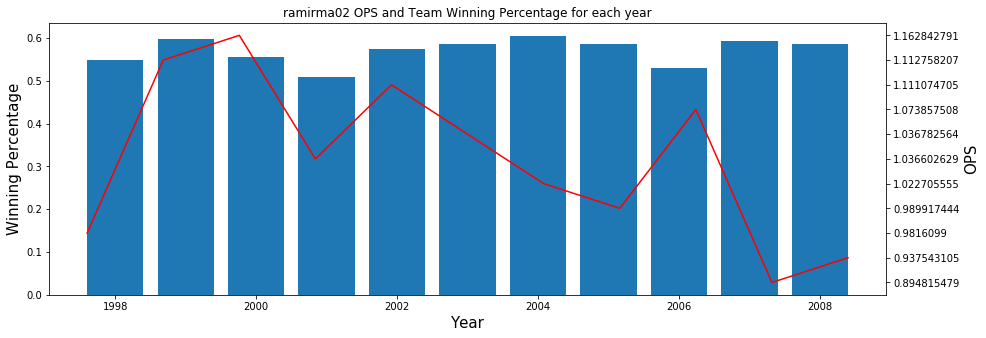

In [46]:
def teamAndPlayer(z):
    x1=z["yearID"]
    y1=z["W%"]

    x2=z["yearID"]
    y2=z["WAR"]
    
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.bar(x1, y1)
    ax.set_xlabel("Year",size=15)
    ax.set_ylabel("Winning Percentage", size=15)
    #ax.tick_params(axis='y')
    plt.title(f"{z['playerID'][0]} WAR and Team Winning Percentage for each year")
    
    ax2.plot(x2, y2, color="r")
    #ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Wins Above Replacement (WAR)',size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')
    
def teamAndPlayer1(z):
    x1=z["yearID"]
    y1=z["W%"]

    x2=z["yearID"]
    y2=z["HR"]
    
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.bar(x1, y1)
    ax.set_xlabel("Year",size=15)
    ax.set_ylabel("Winning Percentage", size=15)
    #ax.tick_params(axis='y')
    plt.title(f"{z['playerID'][0]} HR and Team Winning Percentage for each year")
    
    ax2.plot(x2, y2, color="r")
    #ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Home Runs(HR)',size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')

def teamAndPlayer2(z):
    x1=z["yearID"]
    y1=z["W%"]

    x2=z["yearID"]
    y2=z["OPS"]
    
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.bar(x1, y1)
    ax.set_xlabel("Year",size=15)
    ax.set_ylabel("Winning Percentage", size=15)
    #ax.tick_params(axis='y')
    plt.title(f"{z['playerID'][0]} OPS and Team Winning Percentage for each year")
    
    ax2.plot(x2, y2, color="r")
    #ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_ylabel('OPS',size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')

teamAndPlayer(bondsGiants)
teamAndPlayer(rodTeam)
teamAndPlayer(manTeam)

teamAndPlayer1(bondsGiants)
teamAndPlayer1(rodTeam)
teamAndPlayer1(manTeam)

teamAndPlayer2(bondsGiants)
teamAndPlayer2(rodTeam)
teamAndPlayer2(manTeam)

plt.show()
